# Lista 4

In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

## zadanie 3

In [38]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+h]-x_mean) for i in range(1,n-h))

In [39]:
def teoACVF(h):
    return 2 if h==0 else 0

In [40]:
def zad3(n,h):
    X = np.random.normal(0, np.sqrt(2), size = n)
    return sampleACVF(X, h)

In [42]:
wyniki = []
for h in [0, 1, 2, 3]:
    for n in [100, 1000, 10000, 10**5]:
        wyniki.append([n, h, zad3(n, h), teoACVF(h)])
        
df = pd.DataFrame(wyniki, columns = ['n', 'h', 'sampleACVF', 'True ACVF'])
df

,n,h,sampleACVF,True ACVF
0,100,0,2.252610,2
1,1000,0,2.146780,2
2,10000,0,2.032051,2
3,100000,0,2.006770,2
4,100,1,0.034971,0
5,1000,1,-0.194998,0
6,10000,1,0.015823,0
7,100000,1,0.004303,0
8,100,2,-0.228580,0
9,1000,2,-0.006992,0


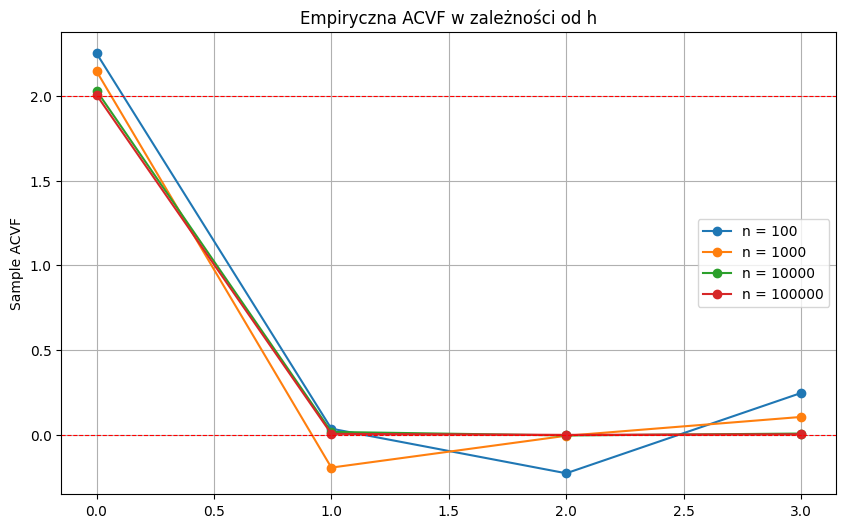

In [43]:
plt.figure(figsize=(10, 6))
for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.plot(subset['h'], subset['sampleACVF'], marker='o', label=f'n = {n}')

plt.axhline(0, color='red', linestyle='dashed', linewidth=0.8)  # Linia dla ACVF = 0
plt.axhline(2, color='red', linestyle='dashed', linewidth=0.8)  # Linia dla ACVF = 2
plt.ylabel('Sample ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

## zadanie 4

In [30]:
def ma1teoACVF(h, sigma, theta):
    if h == 0:
        return sigma*2*(1+theta**2)
    if abs(h) == 1:
        return theta*sigma**2
    else:
        return 0

In [33]:
def ma1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [46]:
ma1teoACF(1, 2)

0.4

In [32]:
def sampleACF(X, h):
    return sampleACVF(X, h)/sampleACVF(X, 0)

In [47]:
def zad4(n, h, sigma, theta):
    Z = np.random.normal(0, sigma**2, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    empACF = sampleACF(X, h)
    trueACF = ma1teoACF(h, theta)
    return n,h,empACF,trueACF
    

In [48]:
sigma = 1
theta = 2
wyniki2 = []
for h in [0, 1, 2, 3]:
    for n in [100, 1000, 10000, 10**5]:
        wyniki2.append(zad4(n,h, sigma = 1, theta = 0.5))
        
df2 = pd.DataFrame(wyniki2, columns = ['n', 'h', 'sampleACF', 'True ACF'])
df2

,n,h,sampleACF,True ACF
0,100,0,1.000000,1.0
1,1000,0,1.000000,1.0
2,10000,0,1.000000,1.0
3,100000,0,1.000000,1.0
4,100,1,0.269561,0.4
5,1000,1,0.438856,0.4
6,10000,1,0.403307,0.4
7,100000,1,0.405804,0.4
8,100,2,0.020631,0.0
9,1000,2,-0.030420,0.0


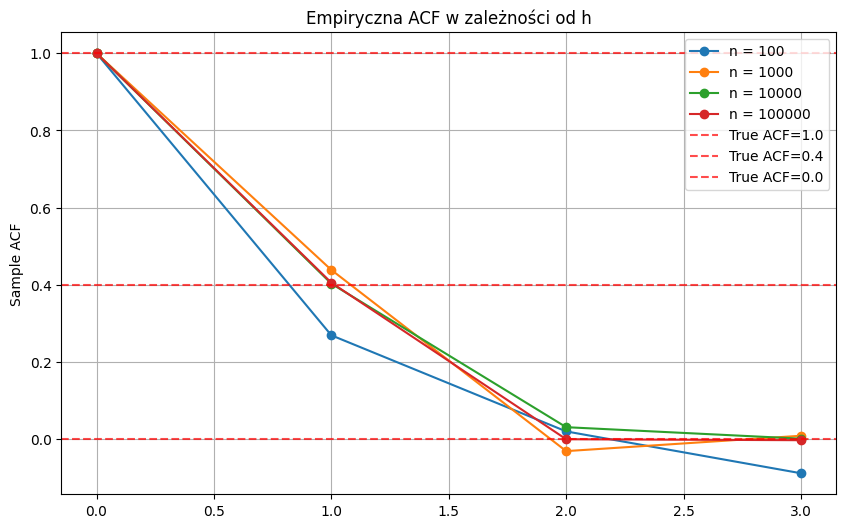

In [56]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.plot(subset['h'], subset['sampleACF'], marker='o', label=f'n = {n}')
acfs = df2['True ACF'].unique()
for value in acfs:
    plt.axhline(y=value, color='r', linestyle='--', alpha=0.7, label=f'True ACF={value}')

plt.ylabel('Sample ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()